In [11]:
# Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Importing Datasets

* Datas are in form of pickle file. We have to use pd.read_pickle to load data.

## Dataset 1

In [12]:
dt = pd.read_pickle("DataSet1_Q")
print("There are {} observations for {} features.".format(dt.shape[0],dt.shape[1]))
dt.head()

There are 348544 observations for 29 features.


,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
0,0.0,0.0,0.00,0.0,0.0000,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,139.0,263.0,130.13,121.0,0.1995,20.50,337140.125583,238.0,37264.0,36208.0,...,107100.0,1006.0,4.0,0.0,0.0,68.515987,1.874518,0.000000,492526.970794,1.124502e+06
2,139.0,263.0,132.88,125.0,0.2050,20.38,337130.850423,238.0,37184.0,36192.0,...,107050.0,1006.0,4.0,0.5,0.0,70.390504,2.139048,0.002165,468451.878186,1.196749e+06
3,140.0,263.0,137.13,129.0,0.2120,20.38,337121.585343,238.0,37168.0,36128.0,...,107000.0,1006.0,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.461999,1.226738e+06
4,140.0,263.0,143.00,133.0,0.2185,20.25,337112.316232,238.0,37184.0,36144.0,...,106950.0,1006.0,4.0,0.0,0.0,75.009352,1.794219,0.000000,419061.141494,1.023915e+06


In [13]:
# Information about the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348544 entries, 0 to 348543
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Altitude (ft)             348544 non-null  float64
 1   Heading (deg)             348544 non-null  float64
 2   CAS (kt)                  348544 non-null  float64
 3   Ground Speed (kt)         348544 non-null  float64
 4   Mach                      348544 non-null  float64
 5   Temp (C)                  348544 non-null  float64
 6   Mass (kg)                 348544 non-null  float64
 7   Apu Fuel (lb/hr)          348544 non-null  float64
 8   FF1 (lb/hr)               348544 non-null  float64
 9   FF2 (lb/hr)               348544 non-null  float64
 10  Throttle 1                348544 non-null  float64
 11  Throttle 2                348544 non-null  float64
 12  Course (deg)              348544 non-null  float64
 13  Wind Direction (deg)      348544 non-null  f

In [14]:
# Describe the data
dt.describe()

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
count,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,...,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,348544.000000,3.485440e+05
mean,31806.615483,207.537043,289.107422,474.853875,0.804390,-41.718496,276602.784568,237.165838,9044.689451,8968.387670,...,53714.586179,287.759207,0.000199,-0.010092,-0.001328,244.361874,-0.000023,-0.000339,138472.211229,1.392608e+05
std,6109.633565,81.259734,22.192467,72.241519,0.098086,13.777820,32940.768960,3.016337,2869.018130,2822.653787,...,31288.661353,117.529967,0.203192,7.487384,1.498629,26.850511,0.182469,0.013436,23753.118914,7.140408e+04
min,-38.000000,0.000000,0.000000,0.000000,0.000000,-58.630000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5.000000,-119.000000,-180.000000,0.000000,-4.461975,-0.216576,0.000000,-7.569946e+05
25%,31003.000000,142.000000,280.630000,442.000000,0.827000,-49.380000,248015.468423,238.000000,8000.000000,7936.000000,...,24600.000000,238.000000,0.000000,0.000000,0.000000,247.729064,-0.075861,0.000000,122866.875636,1.101486e+05
50%,33000.000000,221.000000,290.000000,476.000000,0.830500,-44.250000,274638.682390,238.000000,8816.000000,8736.000000,...,50500.000000,262.000000,0.000000,0.000000,0.000000,250.569398,0.000000,0.000000,135917.205140,1.363265e+05
75%,34998.000000,255.000000,301.880000,517.000000,0.833000,-39.630000,303868.714277,238.000000,9776.000000,9696.000000,...,79900.000000,287.000000,0.000000,0.000000,0.000000,253.209107,0.075301,0.000000,150512.997091,1.627581e+05
max,38011.000000,360.000000,325.380000,664.000000,0.861000,39.880000,349728.903330,239.000000,40720.000000,39648.000000,...,124300.000000,1021.250000,9.000000,110.500000,180.000000,263.237303,4.336536,0.208880,495364.586378,2.022366e+06


## Dataset 2

In [15]:
dt2 = pd.read_pickle("DataSet2_Q")
print("There are {} observations for {} features.".format(dt2.shape[0],dt2.shape[1]))
dt2.head()

There are 375379 observations for 29 features.


,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
0,0.0,0.0,0.00,0.0,0.0000,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00
1,140.0,263.0,131.63,125.0,0.2025,18.25,325554.611609,238.0,31984.0,32544.0,...,109700.0,1008.0,3.0,0.0,0.0,69.279215,2.551095,0.0,485283.286925,1.315804e+06
2,140.0,263.0,136.63,128.0,0.2100,18.13,325546.449257,238.0,31968.0,32576.0,...,109700.0,1008.0,3.5,0.0,0.0,71.830310,2.301695,0.0,460186.379745,1.209495e+06
3,140.0,263.0,140.88,132.0,0.2160,18.13,325538.294968,238.0,31952.0,32528.0,...,109700.0,1008.0,4.0,0.0,0.0,73.882604,1.033760,0.0,442943.004492,7.794714e+05
4,140.0,263.0,142.38,136.0,0.2160,18.25,325530.138664,238.0,31984.0,32512.0,...,109675.0,1008.0,3.5,0.0,0.0,73.897830,1.539221,0.0,442924.664781,9.439875e+05


In [16]:
# Information about the data
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375379 entries, 0 to 375378
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Altitude (ft)             375379 non-null  float64
 1   Heading (deg)             375379 non-null  float64
 2   CAS (kt)                  375379 non-null  float64
 3   Ground Speed (kt)         375379 non-null  float64
 4   Mach                      375379 non-null  float64
 5   Temp (C)                  375379 non-null  float64
 6   Mass (kg)                 375379 non-null  float64
 7   Apu Fuel (lb/hr)          375379 non-null  float64
 8   FF1 (lb/hr)               375379 non-null  float64
 9   FF2 (lb/hr)               375379 non-null  float64
 10  Throttle 1                375379 non-null  float64
 11  Throttle 2                375379 non-null  float64
 12  Course (deg)              375379 non-null  float64
 13  Wind Direction (deg)      375379 non-null  f

In [17]:
# Describe the data
dt2.describe()

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
count,375379.000000,375379.000000,375379.00000,375379.000000,375379.000000,375379.000000,375379.000000,375379.000000,375379.000000,375379.000000,...,375379.000000,375379.000000,375379.000000,375379.000000,375379.000000,375379.000000,375379.000000,375379.000000,375379.000000,3.753790e+05
mean,32221.557956,158.814356,287.48434,489.514597,0.806338,-40.141159,271144.687477,228.699775,8925.746619,8898.965536,...,53358.366811,281.561952,0.000254,-0.001443,-0.004410,245.919992,-0.000030,-0.000306,135425.048955,1.362715e+05
std,5867.950330,98.917483,20.23513,65.256443,0.092944,13.484992,28345.595661,26.564677,2770.793947,2762.138934,...,27013.841644,112.848783,0.197942,7.367231,1.318001,25.920576,0.164442,0.013238,22060.804729,6.754447e+04
min,-29.000000,0.000000,0.00000,0.000000,0.000000,-64.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5.000000,-159.000000,-180.000000,0.000000,-3.448781,-0.265834,0.000000,-8.477846e+05
25%,31999.000000,78.000000,280.38000,475.000000,0.827000,-47.000000,247544.837989,238.000000,8000.000000,7968.000000,...,29700.000000,238.000000,0.000000,0.000000,0.000000,248.077698,-0.075237,0.000000,122703.742252,1.108892e+05
50%,33001.000000,128.000000,290.75000,498.000000,0.830500,-41.000000,269888.905729,239.000000,8752.000000,8720.000000,...,51700.000000,262.000000,0.000000,0.000000,0.000000,252.477186,0.000000,0.000000,133087.449636,1.327464e+05
75%,35000.000000,276.000000,296.25000,526.000000,0.832500,-36.000000,294123.186250,240.000000,9504.000000,9488.000000,...,76000.000000,274.250000,0.000000,0.000000,0.000000,255.441099,0.072767,0.000000,145571.683745,1.553242e+05
max,37018.000000,360.000000,333.88000,603.000000,0.856000,32.500000,337140.125583,241.000000,41120.000000,40544.000000,...,113600.000000,1024.000000,5.000000,138.500000,180.000000,264.493289,3.284705,0.277475,492526.970794,1.416189e+06


# Exploratory Data Analysis

* Firstly , need to check null values in a columns and a row.
* Then we select features for model.

## Dataset 1

In [18]:
# Finding all null values in a columns
dt.isnull().sum()

Altitude (ft)               0
Heading (deg)               0
CAS (kt)                    0
Ground Speed (kt)           0
Mach                        0
Temp (C)                    0
Mass (kg)                   0
Apu Fuel (lb/hr)            0
FF1 (lb/hr)                 0
FF2 (lb/hr)                 0
Throttle 1                  0
Throttle 2                  0
Course (deg)                0
Wind Direction (deg)        0
Wind Speed (kt)             0
Flap (deg)                  0
Landing Gear                0
Speed Break                 0
Zero Fuel Weight (lbs)      0
Fuel Onboard (kg)           0
Air Pressure (mb)           0
Ground Speed Dot (kt/s2)    0
Altitude Dot (ft/s)         0
Heading Dot (deg/s)         0
True Airspeed (m/s)         0
True Airspeed Dot (m/s2)    0
Gamma (rad)                 0
Drag (N)                    0
Thrust (N)                  0
dtype: int64

In [19]:
# Remove rows with all zeros in a Dataframe
dt = dt.loc[(dt != 0).any(axis=1)]
dt

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
1,139.0,263.0,130.13,121.0,0.1995,20.50,337140.125583,238.0,37264.0,36208.0,...,107100.0,1006.00,4.0,0.0,0.0,68.515987,1.874518,0.000000,492526.970794,1.124502e+06
2,139.0,263.0,132.88,125.0,0.2050,20.38,337130.850423,238.0,37184.0,36192.0,...,107050.0,1006.00,4.0,0.5,0.0,70.390504,2.139048,0.002165,468451.878186,1.196749e+06
3,140.0,263.0,137.13,129.0,0.2120,20.38,337121.585343,238.0,37168.0,36128.0,...,107000.0,1006.00,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.461999,1.226738e+06
4,140.0,263.0,143.00,133.0,0.2185,20.25,337112.316232,238.0,37184.0,36144.0,...,106950.0,1006.00,4.0,0.0,0.0,75.009352,1.794219,0.000000,419061.141494,1.023915e+06
5,140.0,263.0,146.63,137.0,0.2225,20.25,337103.039056,238.0,37216.0,36176.0,...,106900.0,1006.00,4.0,0.0,0.0,76.382521,1.888107,0.000000,406718.939987,1.043206e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348539,81.0,55.0,146.63,142.0,0.2190,21.13,237908.167479,237.0,5776.0,5776.0,...,11600.0,1020.75,-1.5,-10.0,0.5,75.293718,-0.749189,-0.040481,346358.712722,7.367388e+04
348540,73.0,56.0,146.00,140.0,0.2180,21.38,237906.790959,237.0,5312.0,5376.0,...,11600.0,1020.50,-2.0,-6.0,1.5,74.981756,-1.117373,-0.024390,345646.075969,2.291218e+04
348541,69.0,58.0,143.38,138.0,0.2125,21.13,237905.497094,237.0,4992.0,5040.0,...,11600.0,1020.25,-3.5,-4.0,2.0,73.058973,-2.688120,-0.016688,342660.301901,-3.357920e+05
348542,65.0,60.0,137.13,133.0,0.2025,21.00,237904.281851,237.0,4704.0,4704.0,...,11600.0,1020.00,-5.0,-4.0,0.5,69.605516,-2.234745,-0.017516,342138.307954,-2.303824e+05


### Feature Selection

* In this section, the goal is finding best features which are correlate well with our target features.
* For this, we use Correlation Matrix which is a statistical method that shows the relationship between two or more variables.

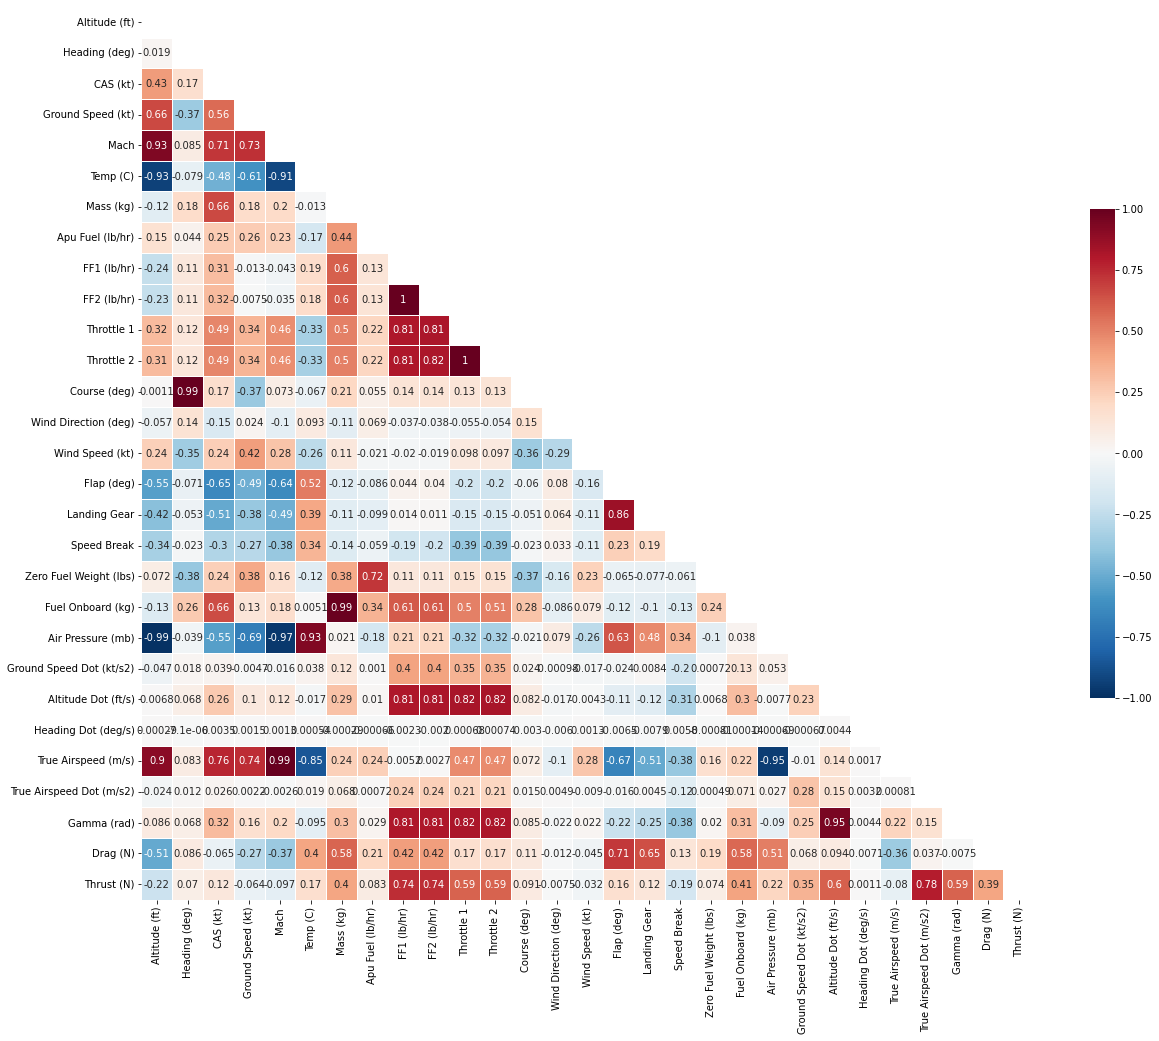

In [20]:
# Correlation Matrix
corr = dt.corr()

# Mask for Upper Triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Matplotlib Figure
f, ax = plt.subplots(figsize=(20, 18))

# Color Palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Heatmap
sns.heatmap(corr, 
            mask = mask, 
            annot = True, 
            vmin = -1.0, 
            vmax = 1.0, 
            center = 0, 
            square = True, 
            linewidths = .5, 
            cbar_kws = {"shrink":.5}, 
            cmap = 'RdBu_r');

Target features (FF1 (lb/hr) and FF2 (lb/hr)) are look positively correlated to each other when viewed from the heatmap. For this reason, we will examine these features more closely. Need to know they are the same or not.

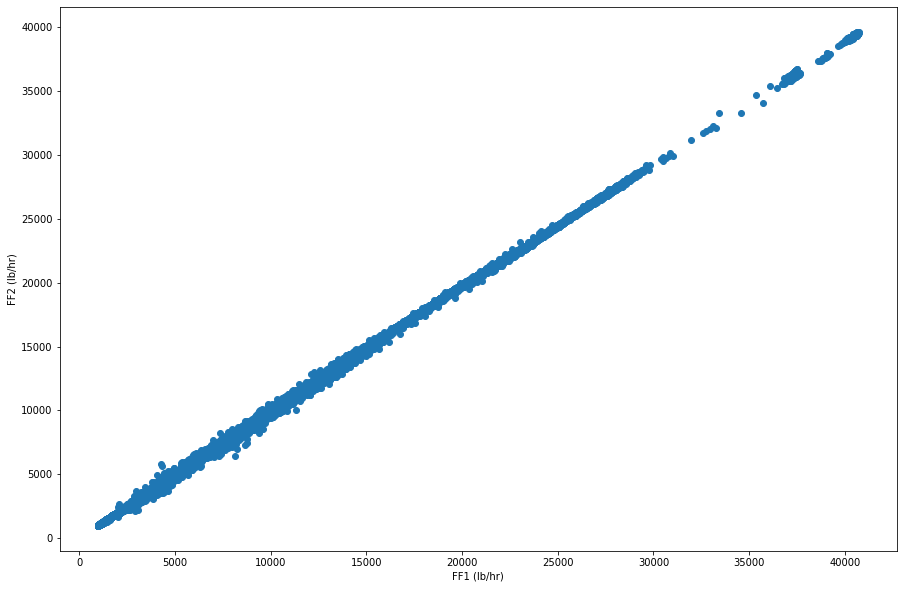

In [21]:
# Firstly, we use a scatter plot to determine the relationship between this two features.
plt.figure(figsize=(15,10))
plt.scatter(dt["FF1 (lb/hr)"], dt["FF2 (lb/hr)"])
plt.xlabel("FF1 (lb/hr)")
plt.ylabel("FF2 (lb/hr)");

As it is seen in the figure, there is a strong relationship our target features but it seems that these are not exactly same. So, we create a new feature and assign the sum of these two values to this feature. In this way, we will have a new target (FF3 (lb/hr)).

In [22]:
# Creating a new feature from "FF1 (lb/hr)" and "FF2 (lb/hr)"
dt["FF3 (lb/hr)"] = dt["FF1 (lb/hr)"] + dt["FF2 (lb/hr)"]
dt["FF3 (lb/hr)"]

1         73472.0
2         73376.0
3         73296.0
4         73328.0
5         73392.0
           ...   
348539    11552.0
348540    10688.0
348541    10032.0
348542     9408.0
348543     8784.0
Name: FF3 (lb/hr), Length: 348543, dtype: float64

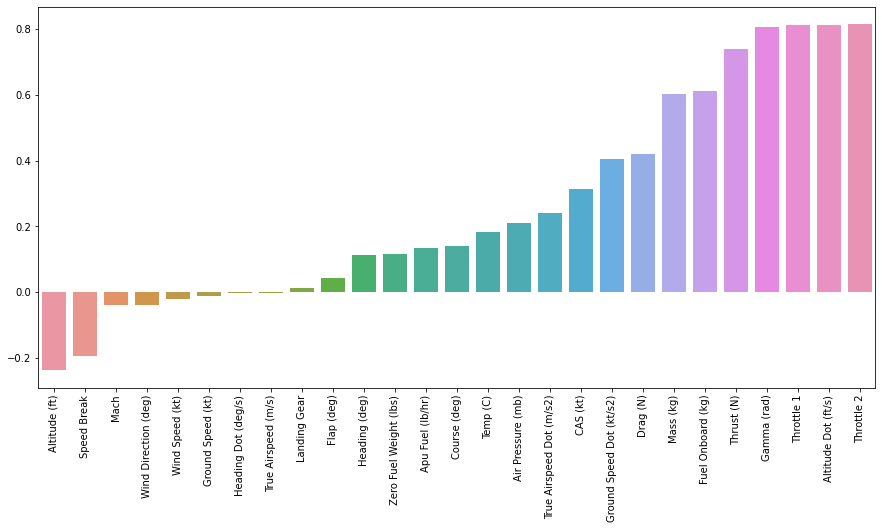

In [23]:
# Relationship of features to our new target ("FF3 (lb/hr)")
plt.figure(figsize=(15,7))

dt_FF3 = dt.corrwith(dt["FF3 (lb/hr)"]).drop(["FF1 (lb/hr)", "FF2 (lb/hr)", "FF3 (lb/hr)"]).sort_values()

g = sns.barplot(x=dt_FF3.index, y=dt_FF3.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

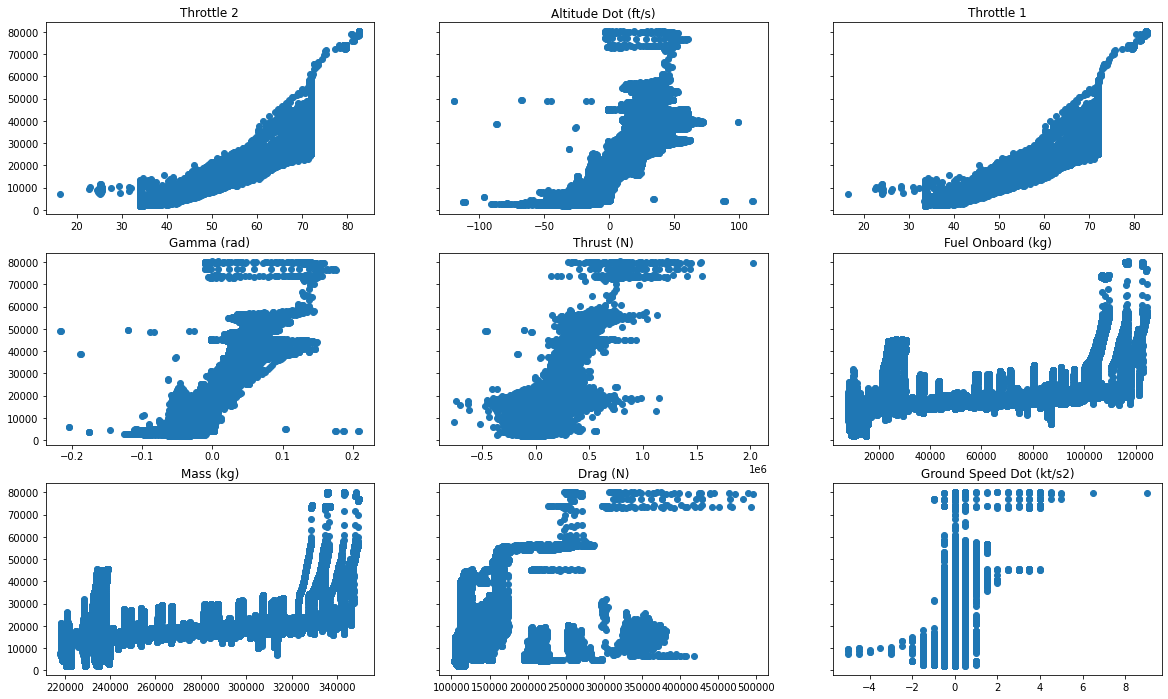

In [24]:
# Finding the first 9 parameters with the highest correlation with our target ("FF3 (lb/hr)")

x = dt.corrwith(dt["FF3 (lb/hr)"]).drop(["FF1 (lb/hr)", "FF2 (lb/hr)"]).sort_values(ascending=False)[1:]

# Drawing Scatter plot as 3x3 subplot for Parametre vs FF3 (lb/hr)
fig ,ax = plt.subplots(3, 3, figsize=(20,12), sharey="row")
cols = x.index

for i in range(3):
    for j in range(3):
        ax[i, j].scatter( dt[ cols[3*i + j] ] , dt["FF3 (lb/hr)"] )
        ax[i, j].set( title = cols[3*i + j] )

For data to take up less space in memory ,the size of the data in the dataset should be reduced. So we will reduce the size in the data.

In [25]:
# Reducing the size for dataset1
dt = dt.astype("float32")
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348543 entries, 1 to 348543
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Altitude (ft)             348543 non-null  float32
 1   Heading (deg)             348543 non-null  float32
 2   CAS (kt)                  348543 non-null  float32
 3   Ground Speed (kt)         348543 non-null  float32
 4   Mach                      348543 non-null  float32
 5   Temp (C)                  348543 non-null  float32
 6   Mass (kg)                 348543 non-null  float32
 7   Apu Fuel (lb/hr)          348543 non-null  float32
 8   FF1 (lb/hr)               348543 non-null  float32
 9   FF2 (lb/hr)               348543 non-null  float32
 10  Throttle 1                348543 non-null  float32
 11  Throttle 2                348543 non-null  float32
 12  Course (deg)              348543 non-null  float32
 13  Wind Direction (deg)      348543 non-null  f

## Dataset 2

In [26]:
# Finding all null values
dt2.isnull().sum()

Altitude (ft)               0
Heading (deg)               0
CAS (kt)                    0
Ground Speed (kt)           0
Mach                        0
Temp (C)                    0
Mass (kg)                   0
Apu Fuel (lb/hr)            0
FF1 (lb/hr)                 0
FF2 (lb/hr)                 0
Throttle 1                  0
Throttle 2                  0
Course (deg)                0
Wind Direction (deg)        0
Wind Speed (kt)             0
Flap (deg)                  0
Landing Gear                0
Speed Break                 0
Zero Fuel Weight (lbs)      0
Fuel Onboard (kg)           0
Air Pressure (mb)           0
Ground Speed Dot (kt/s2)    0
Altitude Dot (ft/s)         0
Heading Dot (deg/s)         0
True Airspeed (m/s)         0
True Airspeed Dot (m/s2)    0
Gamma (rad)                 0
Drag (N)                    0
Thrust (N)                  0
dtype: int64

In [27]:
# Remove rows with all zeros in a Dataframe
dt2 = dt2.loc[(dt2 != 0).any(axis=1)]
dt2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
1,140.0,263.0,131.63,125.0,0.2025,18.25,325554.611609,238.0,31984.0,32544.0,...,109700.0,1008.00,3.0,0.0,0.0,69.279215,2.551095,0.000000,485283.286925,1.315804e+06
2,140.0,263.0,136.63,128.0,0.2100,18.13,325546.449257,238.0,31968.0,32576.0,...,109700.0,1008.00,3.5,0.0,0.0,71.830310,2.301695,0.000000,460186.379745,1.209495e+06
3,140.0,263.0,140.88,132.0,0.2160,18.13,325538.294968,238.0,31952.0,32528.0,...,109700.0,1008.00,4.0,0.0,0.0,73.882604,1.033760,0.000000,442943.004492,7.794714e+05
4,140.0,263.0,142.38,136.0,0.2160,18.25,325530.138664,238.0,31984.0,32512.0,...,109675.0,1008.00,3.5,0.0,0.0,73.897830,1.539221,0.000000,442924.664781,9.439875e+05
5,140.0,263.0,147.50,139.0,0.2250,18.13,325521.992440,238.0,32000.0,32416.0,...,109650.0,1008.00,3.5,0.5,0.0,76.961046,2.643268,0.001980,421236.636058,1.288000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375374,2454.0,74.0,135.38,150.0,0.2130,22.50,208627.567788,241.0,5584.0,5312.0,...,7900.0,929.75,-1.0,-5.5,0.0,73.401225,-0.516910,-0.022839,302981.771326,1.484132e+05
375375,2449.0,74.0,134.25,148.0,0.2120,22.50,208626.269387,241.0,5152.0,4912.0,...,7900.0,930.00,-1.5,-5.0,0.0,73.056619,-0.415419,-0.020861,302395.167373,1.730488e+05
375376,2444.0,74.0,134.00,147.0,0.2105,22.75,208625.057671,241.0,4800.0,4576.0,...,7900.0,930.00,-1.5,-3.5,0.0,72.570387,-0.674056,-0.014700,301608.387444,1.309080e+05
375377,2442.0,74.0,132.75,145.0,0.2080,22.75,208623.942722,241.0,4352.0,4256.0,...,7900.0,930.00,-2.5,-1.0,0.0,71.708506,-1.236298,-0.004251,300558.211231,3.394060e+04


### Feature Selection

* As in the previous dataset, the goal is finding best features which are correlate well with our target features.
* For this, we use Correlation Matrix which is a statistical method that shows the relationship between two or more variables.

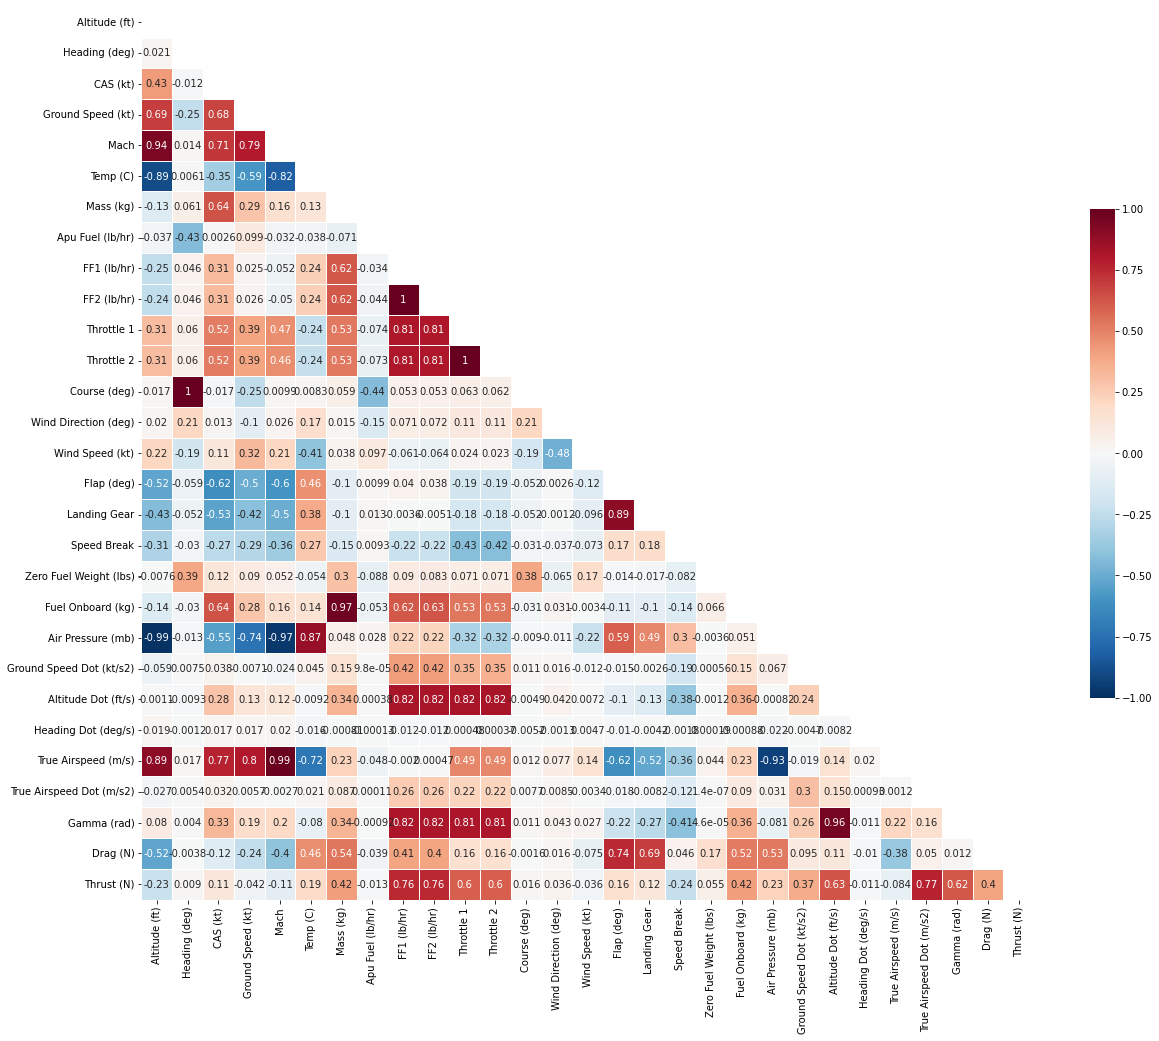

In [28]:
# Correlation Matrix
corr = dt2.corr()

# Mask for Upper Triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Matplotlib Figure
f, ax = plt.subplots(figsize=(20, 18))

# Color Palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Heatmap
sns.heatmap(corr, 
            mask = mask, 
            annot = True, 
            vmin = -1.0, 
            vmax = 1.0, 
            center = 0, 
            square = True, 
            linewidths = .5, 
            cbar_kws = {"shrink":.5}, 
            cmap = 'RdBu_r');

In this dataset, we combine our target data to create a single target as in the previous dataset.

In [29]:
# Creating a new feature from "FF1 (lb/hr)" and "FF2 (lb/hr)"
dt2["FF3 (lb/hr)"] = dt2["FF1 (lb/hr)"] + dt2["FF2 (lb/hr)"]
dt2["FF3 (lb/hr)"]

1         64528.0
2         64544.0
3         64480.0
4         64496.0
5         64416.0
           ...   
375374    10896.0
375375    10064.0
375376     9376.0
375377     8608.0
375378     7904.0
Name: FF3 (lb/hr), Length: 375378, dtype: float64

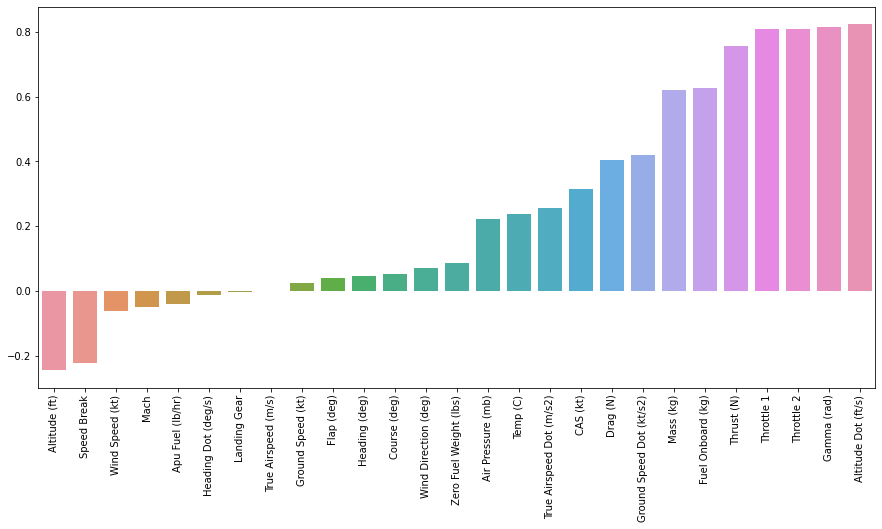

In [30]:
# Relationship of features to our new target ("FF3 (lb/hr)")
plt.figure(figsize=(15,7))

dt2_FF3 = dt2.corrwith(dt2["FF3 (lb/hr)"]).drop(["FF1 (lb/hr)", "FF2 (lb/hr)", "FF3 (lb/hr)"]).sort_values()

g = sns.barplot(x=dt2_FF3.index, y=dt2_FF3.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

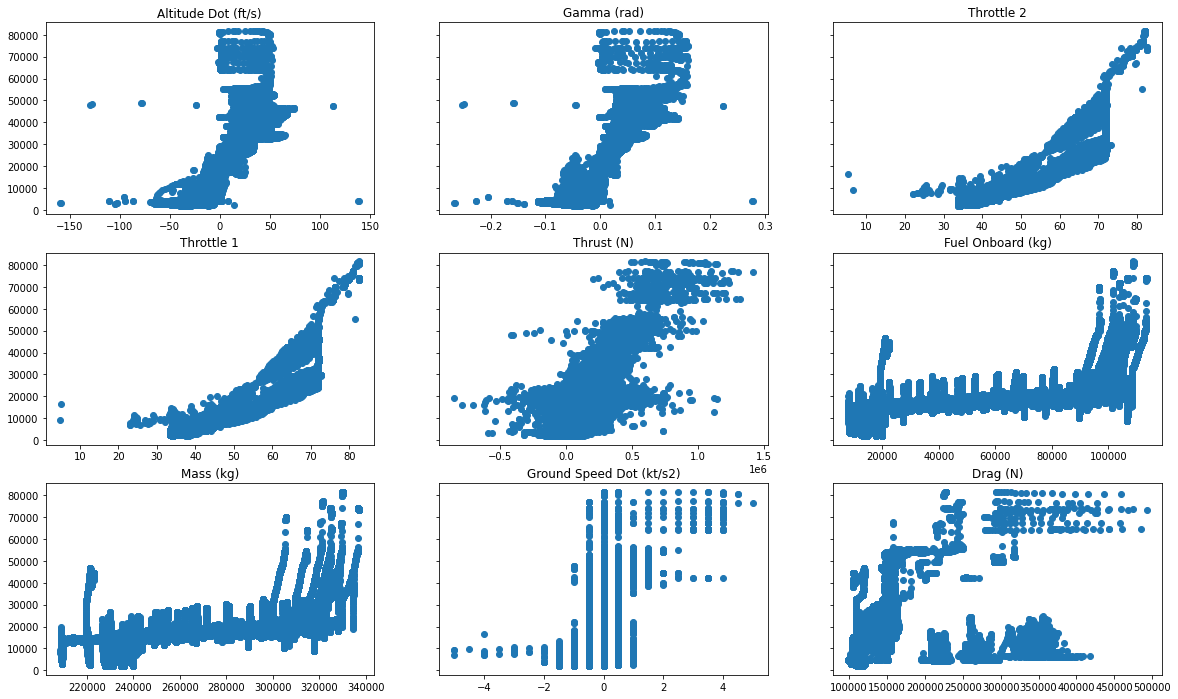

In [31]:
# Finding the first 9 parameters with the highest correlation with our target ("FF3 (lb/hr)")

x = dt2.corrwith(dt2["FF3 (lb/hr)"]).drop(["FF1 (lb/hr)", "FF2 (lb/hr)"]).sort_values(ascending=False)[1:]

# Drawing Scatter plot as 3x3 subplot for Parametre vs FF3 (lb/hr)
fig ,ax = plt.subplots(3, 3, figsize=(20,12), sharey="row")
cols = x.index

for i in range(3):
    for j in range(3):
        ax[i, j].scatter( dt2[ cols[3*i + j] ] , dt2["FF3 (lb/hr)"] )
        ax[i, j].set( title = cols[3*i + j] )

For reasons in the previous dataset, we will reduce the size in the data.

In [32]:
# Reducing the size for dataset 2
dt2 = dt2.astype("float32")
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375378 entries, 1 to 375378
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Altitude (ft)             375378 non-null  float32
 1   Heading (deg)             375378 non-null  float32
 2   CAS (kt)                  375378 non-null  float32
 3   Ground Speed (kt)         375378 non-null  float32
 4   Mach                      375378 non-null  float32
 5   Temp (C)                  375378 non-null  float32
 6   Mass (kg)                 375378 non-null  float32
 7   Apu Fuel (lb/hr)          375378 non-null  float32
 8   FF1 (lb/hr)               375378 non-null  float32
 9   FF2 (lb/hr)               375378 non-null  float32
 10  Throttle 1                375378 non-null  float32
 11  Throttle 2                375378 non-null  float32
 12  Course (deg)              375378 non-null  float32
 13  Wind Direction (deg)      375378 non-null  f

# Models

We will use several machine learning algorithms for our models. 
These algorithms are: 
- LinearRegression, 
- DecisionTreeRegressor 
- GradientBoostingRegressor

**Linear Regression** is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable. This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. 


**DecisionTreeRegressor** observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

**GradientBoostingRegressor** is used to generate an ensemble model by combining the weak learners or weak predictive models. Algorithm is used to fit the model which predicts the continuous value. It builds an additive mode by using multiple decision trees of fixed size as weak learners or weak predictive models.

## First Part

* First of all, we will determine the features that are important for us.
* Then we will split datasets into 3 parts as train, validation and test.
* Dataset1 will be divided into two parts, 75% of the data being train and 25% of the data being validation.  
* In Dataset2, all the data will be used as a test.

In [33]:
# Picking 9 features which are highest correlation with our target ("FF3 (lb/hr)")
fts = ["Throttle 2", "Altitude Dot (ft/s)", "Throttle 1", "Gamma (rad)", "Thrust (N)", "Fuel Onboard (kg)", "Mass (kg)", 
       "Drag (N)", "Ground Speed Dot (kt/s2)"]

In [34]:
# Spiliting the dataset

""" 
For train-validation split just use sklearn.model_selection.train_test_split. 
First to split to train, test and then split train part into validation and train.

"""

X_train, y_train = dt[fts].values, dt["FF3 (lb/hr)"].values
X_test, y_test = dt2[fts].values, dt2["FF3 (lb/hr)"].values

X_train, X_val, y_train, y_val = train_test_split(dt[fts].values, dt["FF3 (lb/hr)"].values, test_size=0.25, random_state=42)

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual value in test set.

In [35]:
def predict(ml_model):
    print('Model is: {}'.format(type(ml_model).__name__))
    model= ml_model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : {}' .format(mean_absolute_error(y_test, y_pred)))
    print('Mean Squared  Error      : {}' .format(mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Error  : {}' .format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('R Squared Error          : {}' .format(r2_score(y_test, y_pred)))
    

* **Mean Absolute Error (MAE)** is a loss function used for regression. The loss is the mean over the absolute differences between true and predicted values, deviations in either direction from the true value are treated the same way.

* **Mean Squared Error (MSE)**  tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. There is no correct value for MSE. Simply put, the lower value is better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.

* **Root Mean Squared Error (RMSE)** is the error rate by the square root of MSE. In other words, it tells how dense the data is around the line that best fits the data. The RMSE value can range from 0 to ∞. Negatively oriented scores, that is, predictors with lower values, perform better. A zero RMSE value means that the model made no errors.

* **R2**  is statistical measure of how close data are to the fitted regression line. R2 is always between 0 to 1. 0 indicated that model explains none of the variability of the response data around it's mean. 1 indicated that model explains all the variablity of the response data around the mean.

In [36]:
predict(LinearRegression())

Model is: LinearRegression
		Error Table
Mean Absolute Error      : 1046.0843505859375
Mean Squared  Error      : 3618719.75
Root Mean Squared Error  : 1902.2933349609375
R Squared Error          : 0.8817669853799297


In [37]:
predict(DecisionTreeRegressor())

Model is: DecisionTreeRegressor
		Error Table
Mean Absolute Error      : 663.1161975395468
Mean Squared  Error      : 1290109.4787227807
Root Mean Squared Error  : 1135.829863457895
R Squared Error          : 0.9578487551339443


In [38]:
predict(GradientBoostingRegressor())

Model is: GradientBoostingRegressor
		Error Table
Mean Absolute Error      : 528.66771517319
Mean Squared  Error      : 711356.141245365
Root Mean Squared Error  : 843.4193151958076
R Squared Error          : 0.976758137668835


Looking at the error tables of the model, the best machine learning algorithm that works with model is GradientBoostingRegressor.

The idea of gradient boosting is to improve weak learners and create a final combined prediction model. Decision trees are mainly used as base learners in this algorithm. The weak learner is identified by the gradient in the loss function. The prediction of a weak learner is compared to actual value and error is calculated. Based on this error, the model can determine the gradient and change the parameters to decrease the error rate in the next training. That's why GradientBoostingRegressor is works best with default values.

Normally, by changing the parameters of the algorithms, can be found best parameters for the algorithms but i wanted to see the result of the algorithms working with their default values.

---

## Second Part

* In this part, we will create the model for the climb, cruise and descent phases of the aircraft. In this way, we will learn more clearly about the fuel consumption of aircraft in different phases.

Here, as in the first part, we will use several machine learning algorithms for our models. These algorithms are: 
- LinearRegression, 
- DecisionTreeRegressor 
- GradientBoostingRegressor

### Dataset1

In [39]:
# Adjusting the phases in the Dataset1
climb = np.gradient(dt["Altitude (ft)"].values) > 3
cruise = np.abs(np.gradient(dt["Altitude (ft)"].values)) < 1
descent = np.gradient(dt["Altitude (ft)"].values) < -3

#### Climb for Dataset1

In [40]:
# Only "climb" datas in the Dataset1
dt_climb = dt[climb == True]
dt_climb

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF3 (lb/hr)
15,151.0,263.0,178.250000,174.0,0.2740,20.250000,337010.187500,238.0,37440.0,36208.0,...,1006.00,3.5,3.5,0.0,94.062073,2.134424,0.011341,314214.531250,1.071020e+06,73648.0
16,155.0,263.0,184.500000,177.0,0.2815,20.000000,337000.906250,238.0,37392.0,36208.0,...,1005.50,3.0,5.0,0.0,96.595566,2.028774,0.015777,308357.093750,1.044197e+06,73600.0
17,161.0,263.0,187.130005,180.0,0.2860,19.879999,336991.593750,238.0,37456.0,36224.0,...,1005.00,3.0,7.5,0.0,98.119621,1.877024,0.023298,305541.843750,1.015078e+06,73680.0
18,170.0,263.0,192.500000,183.0,0.2925,19.879999,336982.250000,238.0,37536.0,36288.0,...,1004.50,2.5,10.5,0.0,100.349609,1.532608,0.031893,302328.937500,9.241848e+05,73824.0
19,182.0,263.0,194.380005,185.0,0.2950,19.750000,336972.906250,238.0,37600.0,36304.0,...,1004.00,2.0,12.5,0.0,101.184837,0.653145,0.037654,301357.375000,6.458798e+05,73904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335300,34998.0,125.0,284.500000,575.0,0.8380,-52.500000,262420.562500,237.0,9536.0,9536.0,...,238.50,0.0,5.0,0.0,249.455612,0.033955,0.006109,130696.945312,1.553296e+05,19072.0
335301,35002.0,125.0,284.500000,575.0,0.8385,-52.380001,262418.218750,237.0,9280.0,9248.0,...,238.25,0.0,4.0,0.0,249.672363,0.148840,0.004883,130833.398438,1.824583e+05,18528.0
335302,35006.0,125.0,284.500000,575.0,0.8390,-52.500000,262415.906250,237.0,9008.0,8960.0,...,238.00,0.0,4.0,0.0,249.753296,0.040465,0.004882,130975.273438,1.541563e+05,17968.0
347433,14380.0,58.0,250.000000,311.0,0.4910,-3.000000,239163.140625,237.0,1968.0,1936.0,...,586.50,0.0,110.0,0.0,161.736618,-0.227581,0.207300,112750.625000,5.445208e+05,3904.0


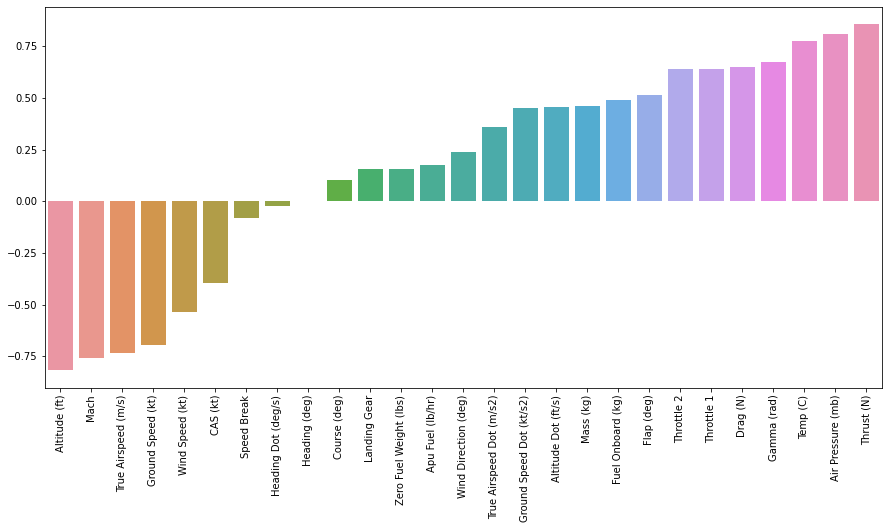

In [41]:
# Relationship of features to our target ("FF3 (lb/hr)") in "climb" datas
plt.figure(figsize=(15,7))

dt_climb_FF3 = dt_climb.corrwith(dt_climb["FF3 (lb/hr)"]).drop(["FF1 (lb/hr)", "FF2 (lb/hr)", "FF3 (lb/hr)"]).sort_values()

g = sns.barplot(x=dt_climb_FF3.index, y=dt_climb_FF3.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [42]:
# The most important features in the "climb" data
climb_fts = ["Thrust (N)", "Air Pressure (mb)", "Temp (C)", "Gamma (rad)", "Drag (N)", "Throttle 1", "Throttle 2", "Flap (deg)", 
                "Fuel Onboard (kg)", "Mass (kg)"]

#### Cruise for Dataset1

In [43]:
# Only "cruise" datas in the Dataset1
dt_cruise = dt[cruise == True]
dt_cruise

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF3 (lb/hr)
1,139.0,263.0,130.130005,121.0,0.1995,20.500000,337140.125000,238.0,37264.0,36208.0,...,1006.0,4.0,0.0,0.0,68.515984,1.874518,0.000000,492526.968750,1.124502e+06,73472.0
2,139.0,263.0,132.880005,125.0,0.2050,20.379999,337130.843750,238.0,37184.0,36192.0,...,1006.0,4.0,0.5,0.0,70.390503,2.139048,0.002165,468451.875000,1.196749e+06,73376.0
3,140.0,263.0,137.130005,129.0,0.2120,20.379999,337121.593750,238.0,37168.0,36128.0,...,1006.0,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.468750,1.226738e+06,73296.0
4,140.0,263.0,143.000000,133.0,0.2185,20.250000,337112.312500,238.0,37184.0,36144.0,...,1006.0,4.0,0.0,0.0,75.009354,1.794219,0.000000,419061.156250,1.023915e+06,73328.0
5,140.0,263.0,146.630005,137.0,0.2225,20.250000,337103.031250,238.0,37216.0,36176.0,...,1006.0,4.0,0.0,0.0,76.382523,1.888107,0.000000,406718.937500,1.043206e+06,73392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348315,3008.0,58.0,170.250000,163.0,0.2705,11.880000,238329.703125,237.0,8096.0,7872.0,...,917.0,0.5,0.5,0.0,91.525734,0.413138,0.001665,220528.468750,3.228832e+05,15968.0
348316,3009.0,58.0,171.000000,164.0,0.2725,11.630000,238327.687500,237.0,7968.0,7744.0,...,917.0,0.5,0.5,0.0,92.161980,0.138534,0.001654,220396.328125,2.572777e+05,15712.0
348317,3009.0,58.0,171.250000,164.0,0.2715,11.500000,238325.703125,237.0,7904.0,7680.0,...,917.0,0.0,-0.5,0.0,91.802803,0.084552,-0.001660,220451.156250,2.367222e+05,15584.0
348319,3007.0,58.0,172.000000,164.0,0.2735,11.630000,238321.734375,237.0,7760.0,7744.0,...,917.0,-0.5,-0.5,0.0,92.500191,0.000000,-0.001648,220350.531250,2.164999e+05,15504.0


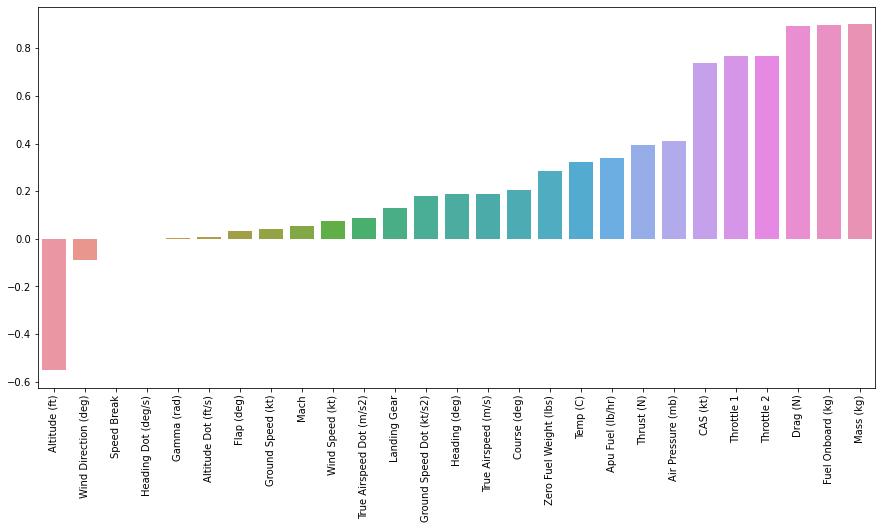

In [44]:
# Relationship of features to our target ("FF3 (lb/hr)") in "cruise" datas
plt.figure(figsize=(15,7))

dt_cruise_FF3 = dt_cruise.corrwith(dt_cruise["FF3 (lb/hr)"]).drop(["FF1 (lb/hr)", "FF2 (lb/hr)", "FF3 (lb/hr)"]).sort_values()

g = sns.barplot(x=dt_cruise_FF3.index, y=dt_cruise_FF3.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [45]:
# The most important features in the "cruise" data
cruise_fts = ["Mass (kg)", "Fuel Onboard (kg)", "Drag (N)", "Throttle 2", "Throttle 1", "CAS (kt)"]

#### Descent for Dataset1

In [46]:
# Only "descent" datas in the Dataset1
dt_descent= dt[descent == True]
dt_descent

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF3 (lb/hr)
10195,31013.0,72.0,298.500000,528.0,0.8205,-39.380001,306954.250000,238.0,8464.0,8384.0,...,287.00,0.0,-4.5,-0.5,251.407684,-0.264335,-0.005456,149611.156250,52049.871094,16848.0
10196,31008.0,71.0,303.380005,528.0,0.8160,-40.130001,306952.125000,238.0,8336.0,8224.0,...,287.00,0.0,-4.0,-0.5,249.627197,-0.756326,-0.004884,149443.156250,-97414.507812,16560.0
10198,31003.0,71.0,302.750000,528.0,0.8195,-39.750000,306947.968750,238.0,8160.0,8032.0,...,287.00,-0.5,-4.0,0.0,250.902359,1.124915,-0.004859,149552.156250,480215.500000,16192.0
10199,30997.0,71.0,302.500000,527.0,0.8240,-40.000000,306945.906250,238.0,8128.0,8032.0,...,287.00,-0.5,-5.5,0.0,252.144867,-0.389667,-0.006649,149832.390625,10212.876953,16160.0
38669,35009.0,125.0,286.500000,558.0,0.8425,-49.630001,243610.609375,238.0,6272.0,6272.0,...,238.50,-0.5,-3.5,0.0,252.422058,-0.856633,-0.004226,121901.484375,-96879.851562,12544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348539,81.0,55.0,146.630005,142.0,0.2190,21.129999,237908.171875,237.0,5776.0,5776.0,...,1020.75,-1.5,-10.0,0.5,75.293716,-0.749189,-0.040481,346358.718750,73673.882812,11552.0
348540,73.0,56.0,146.000000,140.0,0.2180,21.379999,237906.796875,237.0,5312.0,5376.0,...,1020.50,-2.0,-6.0,1.5,74.981758,-1.117373,-0.024390,345646.062500,22912.177734,10688.0
348541,69.0,58.0,143.380005,138.0,0.2125,21.129999,237905.500000,237.0,4992.0,5040.0,...,1020.25,-3.5,-4.0,2.0,73.058975,-2.688120,-0.016688,342660.312500,-335792.031250,10032.0
348542,65.0,60.0,137.130005,133.0,0.2025,21.000000,237904.281250,237.0,4704.0,4704.0,...,1020.00,-5.0,-4.0,0.5,69.605515,-2.234745,-0.017516,342138.312500,-230382.359375,9408.0


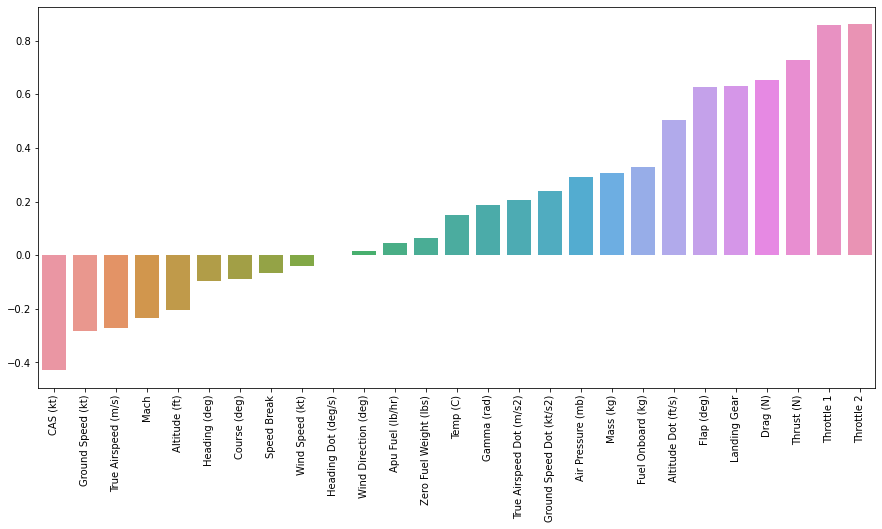

In [47]:
# Relationship of features to our target ("FF3 (lb/hr)") in "descent" datas
plt.figure(figsize=(15,7))

dt_descent_FF3 = dt_descent.corrwith(dt_descent["FF3 (lb/hr)"]).drop(["FF1 (lb/hr)", "FF2 (lb/hr)", "FF3 (lb/hr)"]).sort_values()

g = sns.barplot(x=dt_descent_FF3.index, y=dt_descent_FF3.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [48]:
# The most important features in the "descent" data
descent_fts = ["Throttle 2", "Throttle 1", "Thrust (N)", "Drag (N)", "Landing Gear", "Flap (deg)", "Altitude Dot (ft/s)"]

### Dataset2

In [49]:
# Adjusting the phases in the Dataset2
climb2 = np.gradient(dt2["Altitude (ft)"].values) > 3
descent2 = np.gradient(dt2["Altitude (ft)"].values) < -3
cruise2 = np.abs(np.gradient(dt2["Altitude (ft)"].values)) < 1

* We won't make a feature selection for Dataset2 because the same features should be found in the test and train parts. Therefore, we will use the features we selected in dataset1 for dataset2 as well.

#### Climb for Dataset2

In [50]:
# Only "climb2" datas in the Dataset2
dt2_climb2 = dt2[climb2 == True]
dt2_climb2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF3 (lb/hr)
15,149.0,263.0,179.880005,173.0,0.2720,18.250000,325440.312500,238.0,32000.0,32656.0,...,1007.00,3.0,4.0,0.0,93.056526,1.368784,0.013102,368130.187500,8.554014e+05,64656.0
16,154.0,263.0,184.000000,176.0,0.2780,18.379999,325432.125000,238.0,32000.0,32640.0,...,1006.50,2.5,7.0,0.0,95.130470,2.202849,0.022428,366832.312500,1.155287e+06,64640.0
17,163.0,263.0,186.750000,178.0,0.2850,18.000000,325423.968750,238.0,31952.0,32608.0,...,1006.00,2.5,9.5,0.0,97.462227,1.401311,0.029710,366527.937500,9.173621e+05,64560.0
18,173.0,263.0,190.380005,181.0,0.2865,17.750000,325415.812500,238.0,31968.0,32496.0,...,1005.75,2.0,10.0,0.0,97.933090,0.320889,0.031123,366612.187500,5.703563e+05,64464.0
19,183.0,263.0,189.750000,182.0,0.2870,17.750000,325407.656250,238.0,31968.0,32592.0,...,1005.50,1.5,10.0,0.0,98.104004,0.780226,0.031069,366642.656250,7.196804e+05,64560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368548,30995.0,42.0,281.630005,515.0,0.7620,-44.380001,219682.968750,241.0,8976.0,9008.0,...,287.75,0.0,6.0,0.0,230.970779,0.075778,0.007918,108795.062500,1.425001e+05,17984.0
368549,31001.0,42.0,281.880005,515.0,0.7625,-44.380001,219680.687500,241.0,8880.0,8896.0,...,287.50,0.0,5.0,0.0,231.122345,0.121203,0.006594,108829.531250,1.496610e+05,17776.0
368550,31005.0,42.0,281.880005,515.0,0.7630,-44.500000,219678.453125,241.0,8768.0,8800.0,...,287.25,0.0,4.0,0.0,231.213196,0.088271,0.005273,108866.804688,1.396179e+05,17568.0
374925,10596.0,340.0,258.130005,312.0,0.4715,7.500000,209119.968750,241.0,2064.0,2064.0,...,681.50,-1.0,8.0,0.0,158.304443,-0.485125,0.015403,102106.375000,3.224546e+04,4128.0


#### Cruise for Dataset2

In [51]:
# Only "cruise2" datas in the Dataset2
dt2_cruise2 = dt2[cruise2 == True]
dt2_cruise2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF3 (lb/hr)
1,140.0,263.0,131.630005,125.0,0.2025,18.250000,325554.625000,238.0,31984.0,32544.0,...,1008.0,3.0,0.0,0.0,69.279213,2.551095,0.000000,485283.281250,1.315804e+06,64528.0
2,140.0,263.0,136.630005,128.0,0.2100,18.129999,325546.437500,238.0,31968.0,32576.0,...,1008.0,3.5,0.0,0.0,71.830307,2.301695,0.000000,460186.375000,1.209495e+06,64544.0
3,140.0,263.0,140.880005,132.0,0.2160,18.129999,325538.281250,238.0,31952.0,32528.0,...,1008.0,4.0,0.0,0.0,73.882607,1.033760,0.000000,442943.000000,7.794714e+05,64480.0
4,140.0,263.0,142.380005,136.0,0.2160,18.250000,325530.125000,238.0,31984.0,32512.0,...,1008.0,3.5,0.0,0.0,73.897827,1.539221,0.000000,442924.656250,9.439874e+05,64496.0
5,140.0,263.0,147.500000,139.0,0.2250,18.129999,325522.000000,238.0,32000.0,32416.0,...,1008.0,3.5,0.5,0.0,76.961044,2.643268,0.001980,421236.625000,1.288000e+06,64416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374244,31001.0,41.0,279.880005,468.0,0.7575,-37.500000,209527.593750,241.0,7008.0,7008.0,...,287.0,0.0,0.0,0.0,233.036026,-0.109098,0.000000,104778.757812,8.191977e+04,14016.0
374245,31001.0,41.0,279.500000,468.0,0.7575,-37.380001,209525.984375,241.0,6336.0,6192.0,...,287.0,0.0,-0.5,0.0,233.095383,-0.032164,-0.000654,104778.203125,9.669552e+04,12528.0
374246,31000.0,41.0,280.000000,468.0,0.7575,-37.630001,209524.406250,241.0,6192.0,6112.0,...,287.0,0.0,-0.5,0.0,232.971695,-0.029682,-0.000654,104779.148438,9.721586e+04,12304.0
374247,31000.0,41.0,280.130005,468.0,0.7575,-37.500000,209522.843750,241.0,6112.0,6064.0,...,287.0,0.0,-0.5,0.0,233.036026,-0.015082,-0.000654,104778.609375,1.002748e+05,12176.0


#### Descent for Dataset2

In [52]:
# Only "descent2" datas in the Dataset2
dt2_descent2 = dt2[descent2 == True]
dt2_descent2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),FF3 (lb/hr)
6634,30999.0,57.0,306.130005,510.0,0.8290,-43.750000,305544.218750,238.0,9968.0,9952.0,...,287.25,0.0,-4.5,0.0,251.625214,0.192077,-0.005451,149646.609375,192001.531250,19920.0
6635,30993.0,57.0,308.250000,510.0,0.8265,-43.880001,305541.718750,238.0,9856.0,9840.0,...,287.50,0.0,-6.0,0.0,250.795258,-0.386960,-0.007292,149330.781250,9249.130859,19696.0
6678,31001.0,57.0,302.500000,509.0,0.8180,-43.880001,305427.968750,238.0,11344.0,11392.0,...,287.00,0.0,-4.0,0.0,248.216003,1.560410,-0.004912,148677.750000,610558.437500,22736.0
6707,30992.0,57.0,304.380005,511.0,0.8195,-43.880001,305349.687500,238.0,10192.0,10224.0,...,287.50,0.0,-4.0,0.0,248.671158,-0.160015,-0.004903,148693.468750,85151.398438,20416.0
6708,30987.0,57.0,302.000000,511.0,0.8165,-43.630001,305347.093750,238.0,10144.0,10160.0,...,287.75,0.0,-3.5,0.0,247.895966,0.455164,-0.004303,148577.796875,274674.437500,20304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375372,2466.0,74.0,137.630005,151.0,0.2165,22.629999,208630.484375,241.0,6480.0,6176.0,...,929.25,-1.0,-6.5,0.0,74.623756,-0.525172,-0.026549,305447.125000,141561.609375,12656.0
375373,2460.0,74.0,137.130005,150.0,0.2150,22.500000,208628.968750,241.0,6048.0,5696.0,...,929.50,-0.5,-6.0,0.0,74.090439,-0.611266,-0.024683,304317.187500,126288.390625,11744.0
375374,2454.0,74.0,135.380005,150.0,0.2130,22.500000,208627.562500,241.0,5584.0,5312.0,...,929.75,-1.0,-5.5,0.0,73.401222,-0.516910,-0.022839,302981.781250,148413.218750,10896.0
375375,2449.0,74.0,134.250000,148.0,0.2120,22.500000,208626.265625,241.0,5152.0,4912.0,...,930.00,-1.5,-5.0,0.0,73.056618,-0.415419,-0.020861,302395.156250,173048.765625,10064.0


### Model

* After selection all our important features, we need to create our model with some machine learning algorithms.

In [53]:
def predict_fuel(ml_model, a, b, fts):
    X_train, y_train = a[fts].values, a["FF3 (lb/hr)"].values
    X_test, y_test = b[fts].values, b["FF3 (lb/hr)"].values
    
    print('Model is: {}'.format(type(ml_model).__name__))
    model= ml_model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : {}' .format(mean_absolute_error(y_test, y_pred)))
    print('Mean Squared  Error      : {}' .format(mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Error  : {}' .format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print('R Squared                : {}' .format(r2_score(y_test, y_pred)))

In [54]:
predict_fuel(LinearRegression(), dt_climb, dt2_climb2, climb_fts)

Model is: LinearRegression
		Error Table
Mean Absolute Error      : 1564.1937255859375
Mean Squared  Error      : 4587719.5
Root Mean Squared Error  : 2141.896240234375
R Squared                : 0.9532531424515803


In [55]:
predict_fuel(DecisionTreeRegressor(), dt_climb, dt2_climb2, climb_fts)

Model is: DecisionTreeRegressor
		Error Table
Mean Absolute Error      : 1503.9217253496865
Mean Squared  Error      : 5406433.766140701
Root Mean Squared Error  : 2325.1739216971923
R Squared                : 0.9449107968572414


In [56]:
predict_fuel(GradientBoostingRegressor(), dt_climb, dt2_climb2, climb_fts)

Model is: GradientBoostingRegressor
		Error Table
Mean Absolute Error      : 1315.597648683212
Mean Squared  Error      : 3132005.935185981
Root Mean Squared Error  : 1769.7474212966044
R Squared                : 0.9680862249181034


For the **Climb phase** of the flights, we applied 3 machine learning algorithms and gave very close values to each other. This shows that the model we built is very good.

---

In [57]:
predict_fuel(LinearRegression(), dt_cruise, dt2_cruise2, cruise_fts)

Model is: LinearRegression
		Error Table
Mean Absolute Error      : 425.1936950683594
Mean Squared  Error      : 415105.84375
Root Mean Squared Error  : 644.287109375
R Squared                : 0.8979893894763864


In [58]:
predict_fuel(DecisionTreeRegressor(), dt_cruise, dt2_cruise2, cruise_fts)

Model is: DecisionTreeRegressor
		Error Table
Mean Absolute Error      : 563.2316647264261
Mean Squared  Error      : 672830.245031054
Root Mean Squared Error  : 820.2623025782997
R Squared                : 0.8346546217891025


In [59]:
predict_fuel(GradientBoostingRegressor(), dt_cruise, dt2_cruise2, cruise_fts)

Model is: GradientBoostingRegressor
		Error Table
Mean Absolute Error      : 414.2217561565427
Mean Squared  Error      : 286676.054985855
Root Mean Squared Error  : 535.4213807701883
R Squared                : 0.9295504905052886


When we look at the 3 machine learning algorithms used for the **Cruise phase**, it is seen that the GradientBoostingRegressor algorithm gives the best results. The worst result seems to be in the DecisionTreeRegressor algorithm.

---

In [60]:
predict_fuel(LinearRegression(), dt_descent, dt2_descent2, descent_fts)

Model is: LinearRegression
		Error Table
Mean Absolute Error      : 1443.884033203125
Mean Squared  Error      : 3259287.5
Root Mean Squared Error  : 1805.3497314453125
R Squared                : 0.8262072787855452


In [61]:
predict_fuel(DecisionTreeRegressor(), dt_descent, dt2_descent2, descent_fts)

Model is: DecisionTreeRegressor
		Error Table
Mean Absolute Error      : 795.8153989408136
Mean Squared  Error      : 1557143.308618984
Root Mean Squared Error  : 1247.8554838678172
R Squared                : 0.9169695258519239


In [62]:
predict_fuel(GradientBoostingRegressor(), dt_descent, dt2_descent2, descent_fts)

Model is: GradientBoostingRegressor
		Error Table
Mean Absolute Error      : 726.7267057634942
Mean Squared  Error      : 1080779.7439173479
Root Mean Squared Error  : 1039.6055713189246
R Squared                : 0.9423703302769987


Finally, we look at the **Descent phase**. Here, we used 3 different machine learning algorithms in the same way. Looking at the error table among these algorithms, GradientBoostingRegressor gave the best result, while LinearRegression algorithm gave the worst result.

Although there seem to be big differences between the algorithms for all phases, in fact, even the worst-looking algorithm give a very good result. It also should be noted that the parameters of the algorithms are used by default. If it is changed in the best parameters of the algorithms, it might give different results.